**Visualisation 1. Global Alcohol Consumption Trends 2000-2018: Dynamic Choropleth Map**

In [ ]:
# Firt we have to install the geopandas library 
# We need Geopandas because it has built-in contours for the countries' boundaries
# We also have to import a number of other libraries (see below)

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import geopandas

In [ ]:
# 'geometry' from geopandas contains the information about poligons and multipoligons 
# for every country's and region's boundaries
# We delete the Antarctica continent 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world.name!="Antarctica"]

In [ ]:
# Showing the header of the dataset

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

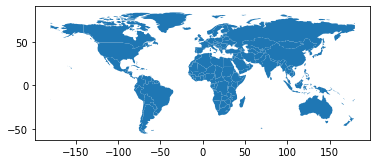

In [ ]:
# Showing the map of the world

world.plot()

<AxesSubplot:>

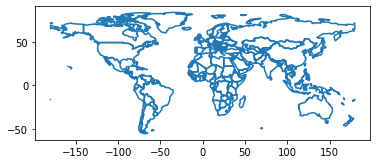

In [ ]:
# Showing the map of the world with boundaries

world.boundary.plot()

In [ ]:
# Importing Kaggle's "Alcohol Consumption by Country" dataset and showing its header

# ! This was perfromed on the Mac operating system. The path to the data file and other paths in this document
# must be adjusted depending on the operating system and the computer used. The username also needs to be changed.
# The path used in this code is specific to my computer !

# You can find the 'alcohol-consumption-vs-gdp-per-capita.csv' dataset in my submission zip folder

# There are a lot of gaps in this data. It is also noteworthy that the alcohol consumption data is only 
# availble for 5 years (2000, 2005, 2010, 2015 and 2018)
# The goal is to reflect all these variables in the two visualisation we are about to produce

alc = pd.read_csv('/Users/gleb.khamin/DATA/DV_CW_2/alcohol-consumption-vs-gdp-per-capita.csv')
alc.head()

,Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN


In [ ]:
# We now have to merge the two datasets
# There are two options for doing this - either merge it by country or merge it by code
# As it appears that the country names in the two datasets are different, we have decided to use the codes instead

alc["Entity"].unique()

array(['Abkhazia', 'Afghanistan', 'Africa', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antarctica', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Austria-Hungary', 'Azerbaijan', 'Baden', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Bavaria', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean Small States',
       'Cayman Islands', 'Central African Republic',
       'Central Europe and the Baltics', 'Chad', 'Channel Islands',
       'Chile', 'Ch

In [ ]:
world["name"].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Is

In [ ]:
# First we are going to visualise the data consumption for 2018

alc2018 = alc[alc.Year == 2018] 

# Dropping missing values
alc2018 = alc2018.drop(columns=['Continent'])
alc2018 = alc2018.dropna()

# Changing column names
alc2018.columns = ['country', 'code', 'year', 'alcocons', 'gdppercap', 'population']

alc2018.head()

,country,code,year,alcocons,gdppercap,population
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0
586,Albania,ALB,2018,7.17,13323.753356,2882735.0
845,Algeria,DZA,2018,0.95,11642.198345,42228415.0
1477,Angola,AGO,2018,6.94,6933.499934,30809787.0
1858,Antigua and Barbuda,ATG,2018,6.38,21030.395072,96282.0


In [ ]:
# Dropping 'pop_est', 'name', 'gdp_md_est' columns

world_new = world.drop(columns=['pop_est', 'name', 'gdp_md_est'])
world_new.columns = ['continent', 'code', 'geometry']

world_new.head()

,continent,code,geometry
0,Oceania,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
# We now want to merge two dataframes and we start with the map - we will try to colour the map based on the 
# alcohol consumtion data

# We are going to use 'left merge' 
world_alc = world_new.merge(alc2018, how='left', on='code')
world_alc = world_alc.dropna()
world_alc.head()

,continent,code,geometry,country,year,alcocons,gdppercap,population
0,Oceania,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2018.0,3.32,13846.158835,883490.0
1,Africa,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2018.0,11.27,2590.201138,56313444.0
3,North America,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2018.0,8.94,48796.813781,37074558.0
4,North America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2018.0,9.87,61585.756038,327096263.0
5,Asia,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2018.0,4.76,25544.344756,18319616.0


<AxesSubplot:>

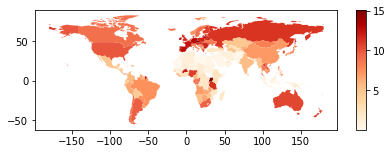

In [ ]:
# Plotting the alcohol consumption map of the world for one year
# Reminder: earlier we selected the year 2018 for plotting

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
world_alc.plot(column='alcocons', ax=ax, legend=True, cax=cax, cmap='OrRd')

Using the Loop for preparing the data and plotting it for multiple years

In [ ]:
# First we preparaed the dataset for all the years for which the data is available
# We cleaned the data from missing values and other variables that were not required for producing the visualisations
# As a result, we got the clean data for two visualisation

# Dropping missing values
alc20XX = alc.drop(columns=['Continent'])
alc20XX = alc20XX.dropna()

# Changing column names
alc20XX.columns = ['country', 'code', 'year', 'alcocons', 'gdppercap', 'population']

alc20XX.head()

,country,code,year,alcocons,gdppercap,population
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0
582,Albania,ALB,2000,6.57,5893.136233,3129246.0
583,Albania,ALB,2005,7.65,8040.878717,3086810.0


In [ ]:
# We looked for the years for which the alcohol consumption data was available
# It turned out there were only 5 differents years for which the data was available
# We sort it out from the minimum to the maximum value
# Then we save it as an array

years = alc20XX["year"].sort_values().unique()
years

array([2000, 2005, 2010, 2015, 2018])

In [ ]:
# We have found the minimun and the maximmum value for the alcohol consumption across all the year across all the countries
# Then we fixed the range of alcohol consumption on each plot for every year so they could apper comparable 

min_alcocons = alc20XX['alcocons'].min()
max_alcocons = alc20XX['alcocons'].max()
print(min_alcocons, max_alcocons)

0.003 20.5


In [ ]:
# Preparing the data world_new, preparing the map for merging, renaming the variables and
# keeping the variables that are the most important
# Also dropping the continent column

world_new = world.drop(columns=['pop_est', 'name', 'gdp_md_est'])
world_new.columns = ['continent', 'code', 'geometry']

world_new.head()

,continent,code,geometry
0,Oceania,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
# Creating a customised function plot_world that can plot the choropleth map
# The fucntion takes in 5 parameters
# We transfer the parameters min_alcocons and max_alcocons which are the same for all the maps to make sure 
# they are plotted within the same range and are easily visually comparable 

def plot_world(world_alc, column_name, min_alcocons, max_alcocons, plt_title):
    mynorm = mpl.colors.Normalize(vmin=min_alcocons, vmax=max_alcocons)
    fig, ax = plt.subplots(1, 1)
    ax.set_title(plt_title)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.2)               
    p = world_alc.plot(column=column_name, ax=ax, legend=True, cax=cax, cmap='OrRd', norm=mynorm)
    return p

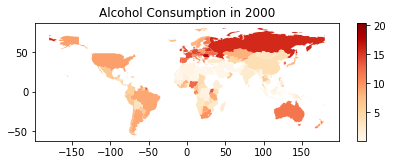

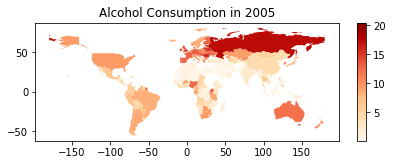

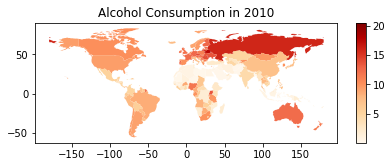

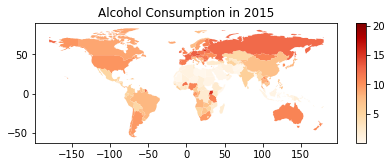

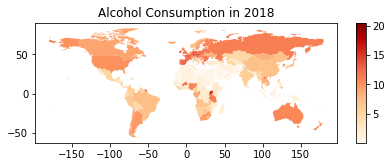

In [ ]:
# Now we want to merge two dataframes
# We start with the map - we will colour the map based on the alcohol consumption data
# We are going to use 'left merge' 

# imageio library was imported and used to produced a GIF out of 5 multiple pictures
# It works by taking the images and appending them into a list. After it saves it into a GIF file

import imageio
from mpl_toolkits.axes_grid1 import make_axes_locatable

images = []
for i in range(5):
    alc_Y = alc20XX[alc20XX.year == years[i]]
    world_alc_Y = world_new.merge(alc_Y, how='left', on='code')
    world_alc_Y = world_alc_Y.dropna()

    # plotting
    plt_title = 'Alcohol Consumption in ' + str(years[i])
    p = plot_world(world_alc_Y, 'alcocons', min_alcocons, max_alcocons, plt_title).get_figure()
    p.savefig('/Users/gleb.khamin/DATA/DV_CW_2/world_alc' + str(i) + '.png', dpi=300)
    images.append(imageio.imread('/Users/gleb.khamin/DATA/DV_CW_2/world_alc' + str(i) + '.png'))

# Saving the visualisation containing 5 frames as a GIF file
# It is further uploaded on the server created for this project and can be viewed following 
# this link http://www.ggsoroka.com/alc.gif

imageio.mimsave('/Users/gleb.khamin/DATA/DV_CW_2/world_alc.gif', images, fps=1)

**Visualisation 2. GDP Per Capita and Alcohol Consumption by Country 2000-2018: Interactive Bubble Plot**

In [ ]:
import plotly.express as px

In [ ]:
# Dropping missing values
alc20XX = alc.drop(columns=['Continent'])
alc20XX = alc20XX.dropna()

# Changing column names
alc20XX.columns = ['country', 'code', 'year', 'alcocons', 'gdppercap', 'population']

alc2018 = alc20XX[alc20XX.year == 2018] 
alc2018.head()

,country,code,year,alcocons,gdppercap,population
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0
586,Albania,ALB,2018,7.17,13323.753356,2882735.0
845,Algeria,DZA,2018,0.95,11642.198345,42228415.0
1477,Angola,AGO,2018,6.94,6933.499934,30809787.0
1858,Antigua and Barbuda,ATG,2018,6.38,21030.395072,96282.0


In [ ]:
# Dropping the geometry column 
# Dropping duplicates

world_continents = world_new.drop(columns=['geometry']).drop_duplicates()
world_continents.head()

,continent,code
0,Oceania,FJI
1,Africa,TZA
2,Africa,ESH
3,North America,CAN
4,North America,USA


In [ ]:
# We now want to merge the two dataframes and we start with the map - we will try to colour the map based on the
# alcohol consumtion data

# We are going to use 'left merge' 
alc20XX_continent = alc20XX.merge(world_continents, how='left', on='code')
alc20XX_continent = alc20XX_continent.dropna().sort_values('year')
alc20XX_continent.head()

,country,code,year,alcocons,gdppercap,population,continent
575,Nicaragua,NIC,2000,5.05,3968.892933,5069310.0,North America
151,Central African Republic,CAF,2000,3.68,1040.103835,3640421.0,Africa
388,Italy,ITA,2000,10.37,43053.933064,56692178.0,Europe
655,Russia,RUS,2000,15.73,14569.936583,146404890.0,Europe
806,Tunisia,TUN,2000,1.36,7329.345126,9708347.0,Africa


In [ ]:
# This is a preliminary plot without the interactive controls for one year only

fig_2 = px.scatter(alc20XX_continent.query('year==2018'), x='gdppercap', y='alcocons', 
                   size='population', color='continent', hover_name='country', log_x=True, size_max=50)
fig_2.show()

In [ ]:
# We estimate the minimum and maximum values for GDP per Capita to make this plot visually comparable 

min_gdppercap = alc20XX['gdppercap'].min()
max_gdppercap = alc20XX['gdppercap'].max()
print(min_gdppercap, max_gdppercap)

630.701613637085 113589.670473448


In [ ]:
# We estimate the minimum and maximum values for alcohol consumption to make the plots visually comparable 

min_alcocons = alc20XX['alcocons'].min()
max_alcocons = alc20XX['alcocons'].max()
print(min_alcocons, max_alcocons)

0.003 20.5


In [ ]:
# This is an interactive bubble plot equipped with a slider for selecting the years
# The logarithmic scale was applied for the x-axis due to the high variability of GDP per Capita data

fig_2 = px.scatter(alc20XX_continent, x='gdppercap', y='alcocons', animation_frame='year', animation_group='country',
                   range_x=[min_gdppercap*0.9, max_gdppercap*1.05], range_y=[min_alcocons-2.5, max_alcocons+1], 
                   size='population', color='continent', hover_name='country', log_x=True, size_max=50, 
                   labels={'gdppercap':'GDP per capita, $', 'alcocons':'Alcohol consumption, litres per capita'})
fig_2.update_layout(title={'text': 'GDP Per Capita and Alcohol Consumption by Country', 'x':0.47})

fig_2['layout'].pop('updatemenus')
fig_2.show()

In [ ]:
# We used the library plotly to export the interactive visualisation as the html file
# It is further uploaded on the server created for this project and can be viewed following 
# this link http://www.ggsoroka.com/visualisation.html

import plotly.io as pio
pio.write_html(fig_2, file='/Users/gleb.khamin/DATA/DV_CW_2/visualisation.html', auto_open=True)